## Aim: Advertising Sales Channel Prediction

### Problem Statement:

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel. 

###### Importing Required library

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Data Description:

Data is having 200 Rows and 5 Columns.

All the data columns are contineus in nature.

We have first column as Unnamed:0, which is serial number, we can drop this data later.

Our Feature data columns are [TV,	radio,	newspaper] and Target column is [sales]

###### Checking Null Values in the data:

In [4]:
data.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Data is not having any null value, we can proceed for further analysis.

##### Descriptive Statistics:

In [5]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


##### Descriptive Statistics Summary:

TV

min: 0.700000

max: 296.400000

Mean:147.042500

Std: 85.854236

radio

min: 0.000000

max: 49.600000

Mean: 23.264000

Std: 14.846809
    
newspaper

min: 0.300000

max:114.000000

Mean: 30.554000

Std: 21.778621
    
newspaper

min: 1.600000

max:27.000000

Mean:14.022500

Std: 5.217457

##### Data preprocessing

In [6]:
data.head(3)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


First we will standardize our data columns name.

In [7]:
data.rename(columns={'Unnamed: 0':'Serial', 'TV':'TV', 'radio':'Radio', 'newspaper':'Newspaper', 'sales':'Sales'},inplace=True)

In [8]:
data.head(3)

,Serial,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Serial     200 non-null    int64  
 1   TV         200 non-null    float64
 2   Radio      200 non-null    float64
 3   Newspaper  200 non-null    float64
 4   Sales      200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


Here we can see data having one interger column and all other columns are float values.

Here Serial not having any impact on sales data, so we can drop this.

In [10]:
data.drop(['Serial'], axis=1, inplace = True )

In [11]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# EDA

##### Univariate analysis of Data.

In [12]:
data.head(1)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1


<AxesSubplot:xlabel='TV', ylabel='Density'>

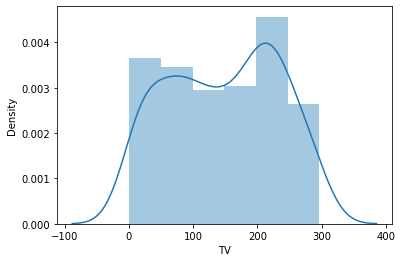

In [13]:
sns.distplot(data['TV'])

Data is equaly distributed between 0 to nearly 300. It is having almost equal density.

<AxesSubplot:xlabel='Radio', ylabel='Density'>

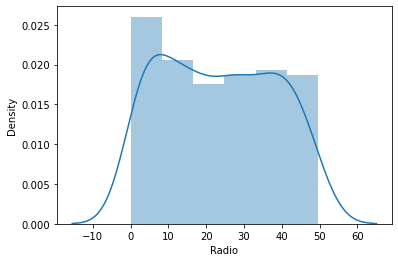

In [14]:
sns.distplot( data['Radio'])

Data is equaly distributed between 0 to nearly 50. It is having almost equal density.

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

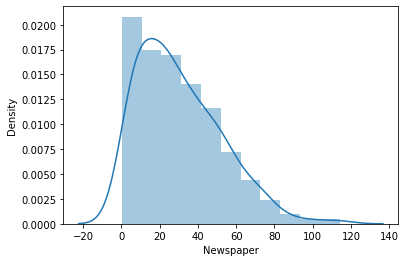

In [15]:
sns.distplot( data['Newspaper'])

Here we can see the density contineusly decreasing with max Newspaper channel value.

<AxesSubplot:xlabel='Sales', ylabel='Density'>

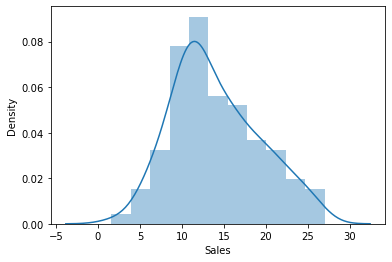

In [16]:
sns.distplot( data['Sales'])

Here we can see max sales density is between 10 to nearly 15.

#### Bivariate Analysis

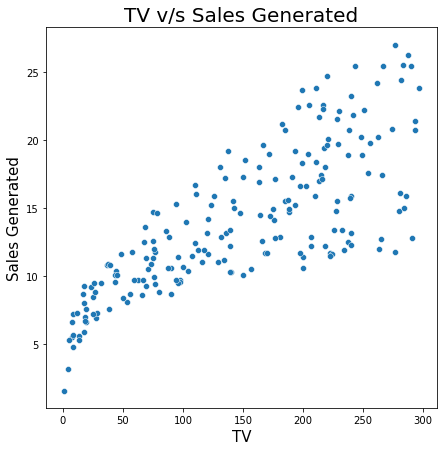

In [17]:
plt.figure(figsize=(7,7))

sns.scatterplot(x=data['TV'], y=data['Sales'])
plt.xlabel('TV', fontsize= 15)
plt.ylabel('Sales Generated', fontsize=15)
plt.title('TV v/s Sales Generated',fontsize=20)
plt.show()


We can see TV and Sale are having linear relationship. Both are having Direct relation. As one increse other also incleasing.

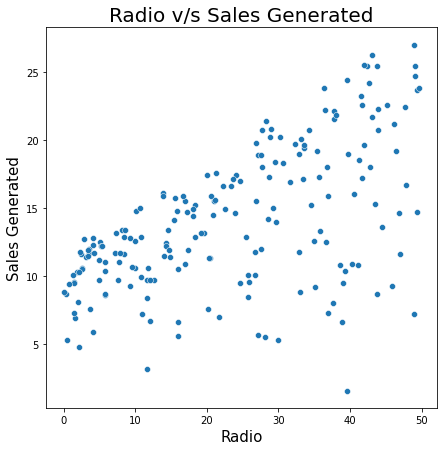

In [18]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=data['Radio'], y=data['Sales'])
plt.xlabel('Radio', fontsize= 15)
plt.ylabel('Sales Generated', fontsize=15)
plt.title('Radio v/s Sales Generated',fontsize=20)
plt.show()

Both are having Direct relation. As one increse other also incleasing. Some poits showing its sales decreasing.

In [19]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


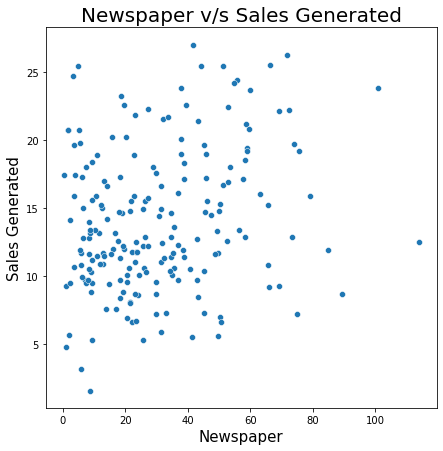

In [20]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=data['Newspaper'], y=data['Sales'])
plt.xlabel('Newspaper', fontsize= 15)
plt.ylabel('Sales Generated', fontsize=15)
plt.title('Newspaper v/s Sales Generated',fontsize=20)
plt.show()

Here we can see data is not having perfect linear relationship. Initialy sales increase but after that sales decresing.

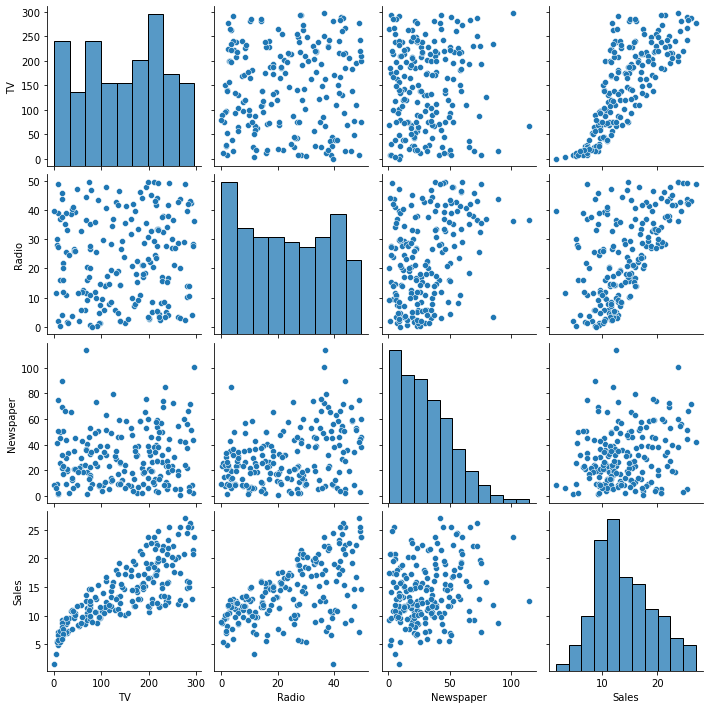

In [21]:
sns.pairplot(data)

Here we can sumerise TV and Radio having stronge linear relationship with sales.

On the  otherhand for newspaper , sales decresing at some points with increase in Newspaper.

# Correlation 

In [22]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


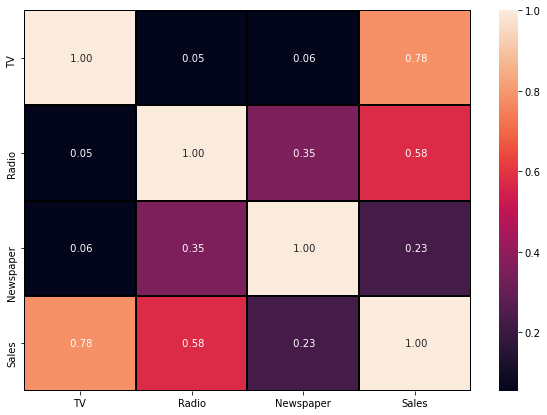

In [23]:
plt.figure(figsize= (10,7))
sns.heatmap(data.corr(), annot= True, linewidth=1, linecolor='Black',fmt=' .2f')
plt.show()

Here we can see Tv is having strong corelation with sales, and Newspaper having less correlation as compared to others.

Radio is also having good correlation with sales.

All the three Features are contributing positively to predict sales data.

#### Checking Outliers

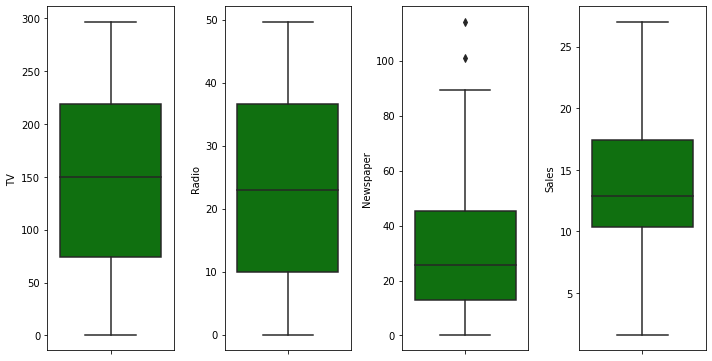

In [24]:
collist= data.columns.values
plt.figure(figsize= (10,20))

for i in range(0, len(collist)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=data[collist[i]], color='green', orient='x')
    plt.tight_layout()

Here we can see only Newspaper having outliers present.

#### Removing outliers

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(data))

In [26]:
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

Only Two outliers are present.

In [27]:
df_new = data[(z<3).all(axis=1)]
print(data.shape)
print(df_new.shape)

(200, 4)
(198, 4)


In [28]:
Loss_percentage=(200-198)/200*100
print(Loss_percentage)

1.0


### Skewness

In [29]:
df_new.skew()

TV          -0.082332
Radio        0.114842
Newspaper    0.650112
Sales        0.407130
dtype: float64

Here we can see Newspaper column having skewness.

So before going for removing stage lest Dividing data in feature and vectors.

In [30]:
x=df_new.iloc[:,0:-1]

In [31]:
y=df_new.iloc[:,-1]

In [32]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

We have removed the skewness present in the data.

### Scaling data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
SD= StandardScaler()
X=SD.fit_transform(x)

In [35]:
X=pd.DataFrame(data=X)

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    vif=pd.DataFrame()
    vif['variables']=x.columns
    vif['VIF FACTOR']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [37]:
calc_vif(X)

,variables,VIF FACTOR
0,0,1.002693
1,1,1.088710
2,2,1.087940


We can see data is not having multicollinearuty we can proceed.

# Model Design

In [38]:
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
lr=LinearRegression()
for i in range(0, 100):
    x_train, x_test, y_train, y_test= train_test_split(X,y,random_state= i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train= lr.predict(x_train)
    pred_test= lr.predict(x_test)
    print(f"At Random Stat {i}, the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At Random Stat {i}, the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At Random Stat 0, the training accuracy is:0.901291002097885
At Random Stat 0, the testing accuracy is:0.9153223525494354


At Random Stat 1, the training accuracy is:0.907560705387535
At Random Stat 1, the testing accuracy is:0.8899875371730133


At Random Stat 2, the training accuracy is:0.9145487608535885
At Random Stat 2, the testing accuracy is:0.8690670885581865


At Random Stat 3, the training accuracy is:0.9038683476410915
At Random Stat 3, the testing accuracy is:0.9094654993350766


At Random Stat 4, the training accuracy is:0.9080156627542778
At Random Stat 4, the testing accuracy is:0.8805025579845183


At Random Stat 5, the training accuracy is:0.9044410731238212
At Random Stat 5, the testing accuracy is:0.8945026194148484


At Random Stat 6, the training accuracy is:0.9071648377019736
At Random Stat 6, the testing accuracy is:0.8921657380222972


At Random Stat 7, the training accuracy is:0.9034105955818168
At Random Stat 7, the testing accuracy is:0.9083214353182578


At

At Random Stat 55, the training accuracy is:0.8885
At Random Stat 55, the testing accuracy is:0.8879

In [40]:
x_train_b, x_test_b, y_train_b, y_test_b= train_test_split(X,y,test_size=0.20, random_state=55)

In [41]:
lr.fit(x_train_b,y_train_b)
pred_test=lr.predict(x_test_b)

print(r2_score(y_test_b,pred_test))

0.9047295196612013


Linear Regression model given good Accuracy.

# Cross Validation of Model

In [42]:
test_accuracy= r2_score(y_test_b,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,X,y,cv=i)
    cv_mean=cv_score.mean()
    print(f"At cross fold {i} the Cross Val score is {cv_mean*100} and Accuracy score is {test_accuracy*100}")

At cross fold 2 the Cross Val score is 90.17064197605747 and Accuracy score is 90.47295196612014
At cross fold 3 the Cross Val score is 89.73645562112824 and Accuracy score is 90.47295196612014
At cross fold 4 the Cross Val score is 89.86654359289577 and Accuracy score is 90.47295196612014
At cross fold 5 the Cross Val score is 89.58270968555071 and Accuracy score is 90.47295196612014
At cross fold 6 the Cross Val score is 89.87009469201537 and Accuracy score is 90.47295196612014
At cross fold 7 the Cross Val score is 89.4944294999198 and Accuracy score is 90.47295196612014
At cross fold 8 the Cross Val score is 89.80187277211998 and Accuracy score is 90.47295196612014
At cross fold 9 the Cross Val score is 89.38982316418993 and Accuracy score is 90.47295196612014


At cross fold 2 the Cross Val score is 88.43195997533311 and Accuracy score is 88.79745823374323

Selcted cv=2 , Because we having very less diffrence in percentage at cv=2.

Model accuracy is good, but we can use regularization to find best results, lets check.

# Lasso

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'random_state': list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls, parameters)
clf.fit(x_train_b, y_train_b)
print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [44]:
ls=Lasso(alpha=0.1, random_state=0)
ls.fit(x_train_b, y_train_b)
ls.score(x_train_b, y_train_b)
ls_pred=ls.predict(x_test_b)

lsd=r2_score(y_test_b, ls_pred)
print('R2 score:', lsd*100)

rdscore= cross_val_score(ls,X,y,cv=4)
lsc=rdscore.mean()
print('Cross val Score :', lsc*100)

R2 score: 90.03579240716098
Cross val Score : 89.80785666814384


In [45]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,ls_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,ls_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,ls_pred)))

Error:
Mean Absolute Error: 1.4399669185457853
Mean Squared Error: 3.1492351397028364
Root Mean Square Error: 1.774608446870136


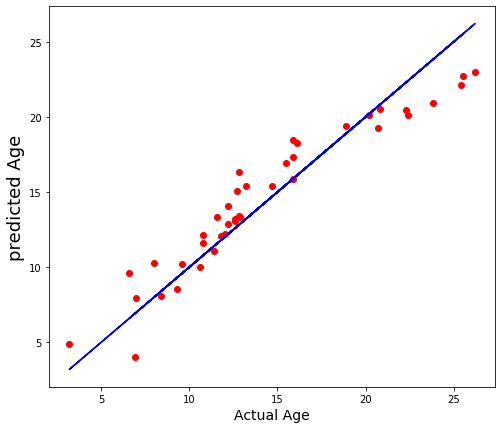

In [46]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= ls_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

We are getting good accuracy score, but it is not improved one. lets check with anather model.

# 2.Ridge

In [47]:
parameters= {'alpha':[0.0001,0.001,0.01,0.1,1,10], 'fit_intercept': [True,False], 'normalize':[True, False], 'copy_X': [True , False], 'tol':[0.0001,0.001,0.01,0.1,1,10]}
rd=Ridge()
rdclf=GridSearchCV(rd, parameters)
rdclf.fit(x_train_b, y_train_b)
print(rdclf.best_params_)

{'alpha': 0.01, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'tol': 0.0001}


In [48]:
rd= Ridge(alpha= 0.01, copy_X= True, fit_intercept= True, normalize= True, random_state=0 , tol= 0.0001)
rd.fit(x_train_b, y_train_b)
rd.score(x_train_b, y_train_b)
rd_pred= rd.predict(x_test_b)

rds=r2_score(y_test_b, rd_pred)
print('r2 score: ', rds*100)

rdcvscore= cross_val_score(rd,X,y,cv=2)
rdcv=rdcvscore.mean()
print('Cross val Score', rdcv*100)

r2 score:  90.3686860663911
Cross val Score 90.15897912499331


In [49]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rd_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rd_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rd_pred)))

Error:
Mean Absolute Error: 1.4181158174033963
Mean Squared Error: 3.0440225174582745
Root Mean Square Error: 1.7447127320731841


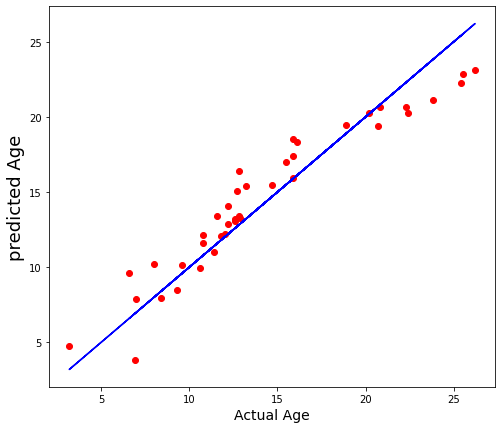

In [50]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rd_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

Ridge is performing same as the lasso, lets try DecisionTreeRegressor.

# 3.DecisionTreeRegressor

In [51]:
parameters={'criterion':['mse','friedman_mse', 'mae', 'poisson'], 'splitter':['best', 'random']}
dt=DecisionTreeRegressor()
dtclf= GridSearchCV(dt, parameters )
dtclf.fit(x_train_b, y_train_b)
print(dtclf.best_params_)

{'criterion': 'friedman_mse', 'splitter': 'random'}


In [52]:
dt=DecisionTreeRegressor(criterion='friedman_mse', splitter='best' )
dt.fit(x_train_b, y_train_b)
dt.score(x_train_b, y_train_b)
dt_pred=dt.predict(x_test_b)

dt_score=r2_score(y_test_b, dt_pred)
print('R2 Score:', dt_score*100)

dtcvscore=cross_val_score(dt,X,y,cv=4)
dtcv=dtcvscore.mean()
print('Cross Val Score:', dtcv*100)

R2 Score: 95.92001069434963
Cross Val Score: 94.34762672409059


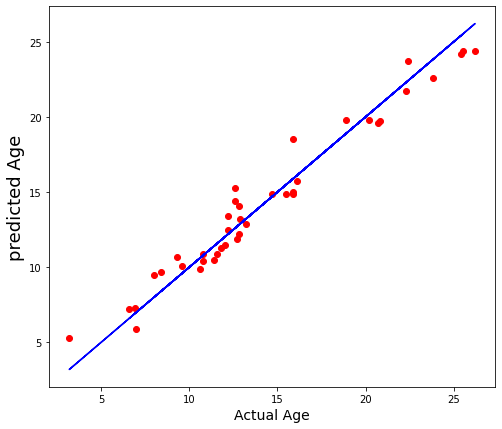

In [53]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= dt_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

Here we are getting good results, when we are using CV=4 , lets try this for KNeighborsRegressor.

# 4. KNeighborsRegressor

In [54]:
parameters={'n_neighbors':[1,2,3,5,6,7,8,9,10],'weights':['uniform', 'distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}
kn=KNeighborsRegressor()
knclf=GridSearchCV(kn,parameters)
knclf.fit(x_train_b, y_train_b)
print(knclf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


In [55]:
kn=KNeighborsRegressor(algorithm='auto', n_neighbors=5, weights='distance')
kn.fit(x_train_b, y_train_b)
kn.score(x_train_b,y_train_b)
kn_pred=kn.predict(x_test_b)

kn_score= r2_score(y_test_b, kn_pred)
print('R2 Score: 0', kn_score*100)

kn_cvscore=cross_val_score(kn,X,y, cv=4)
cv_mean=kn_cvscore.mean()
print('Cross val Score :',cv_mean*100 )

R2 Score: 0 94.88768275216405
Cross val Score : 95.1416462723989


In [56]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,kn_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,kn_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,kn_pred)))

Error:
Mean Absolute Error: 0.8935166775271253
Mean Squared Error: 1.6157721496854762
Root Mean Square Error: 1.2711302646406766


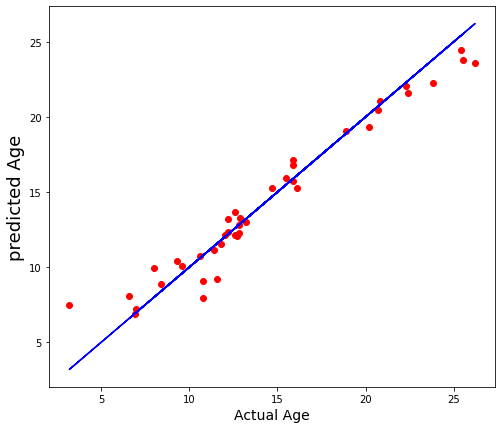

In [57]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= kn_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

Here KNeighborsRegressor given good accuracy and R2_score, we can consider this, but lets check model using Ensemble Method.

# Ensemble Techniques

In [58]:
parameters={'criterion':['mse', 'mae'],'max_features':['auto', 'sqrt', 'log2']}
rf=RandomForestRegressor()
rfclf=GridSearchCV(rf, parameters)
rfclf.fit(x_train_b, y_train_b)
print(rfclf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [59]:
rf=RandomForestRegressor(criterion='mae', max_features='auto')
rf.fit(x_train_b, y_train_b)
rf.score(x_train_b,y_train_b)
rf_pred=rf.predict(x_test_b)

rf_score= r2_score(y_test_b, rf_pred)
print('R2 score:', rf_score*100)

rfcv=cross_val_score(rf,X,y, cv=4)
rfcvscore=rfcv.mean()
print('Cross val Score :',rfcvscore*100 )

R2 score: 98.39287277362546
Cross val Score : 97.68864395086581


In [60]:
print('Error:')

print('Mean Absolute Error:',mean_absolute_error(y_test_b,rf_pred))
print('Mean Squared Error:', mean_squared_error(y_test_b,rf_pred))
print('Root Mean Square Error:', np.sqrt(mean_squared_error(y_test_b,rf_pred)))

Error:
Mean Absolute Error: 0.5985124999999987
Mean Squared Error: 0.50794019375
Root Mean Square Error: 0.7126992309172222


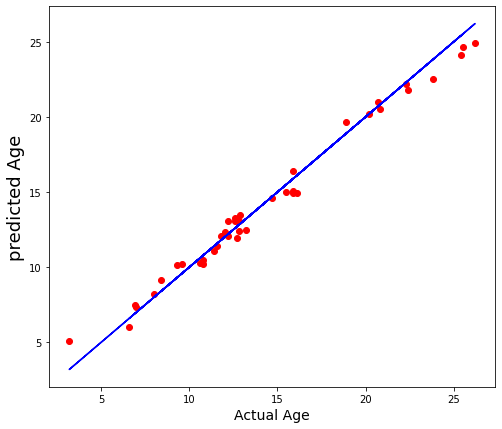

In [61]:
plt.figure(figsize=(8,7))
plt.scatter(x=y_test_b, y= rf_pred, color='r')
plt.plot(y_test_b,y_test_b, color='b')
plt.xlabel('Actual Age', fontsize= 14 )
plt.ylabel('predicted Age', fontsize= 18)
plt.show()

We are getting best results using RandomForestRegressor, We can select this model as final best fit model.

R2 score: 98.29746056656323

Cross val Score : 97.709586198418

In [62]:
import pickle
filename='Advertising_Sales_Channel_Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))

In [63]:
import numpy as np
a=np.array(y_test_b)
predicted= np.array(rf.predict(x_test_b))
df_com= pd.DataFrame({'original':a, 'predicted':predicted}, index= range(len(a)))
df_com

,original,predicted
0,11.8,12.0940
1,15.9,16.3950
2,20.8,20.5310
3,12.7,11.9680
4,6.6,6.0170
5,10.8,10.2270
6,13.2,12.4500
7,15.5,14.9820
8,15.9,14.9240
9,20.2,20.1940
